# Question1

(1) Plot simulated Russell 1000 Index (selected at the last se- lection period) return path for the 1,000 simulation periods.
(2) Apply ADF test to see whether the Russell 1000 Index re- turn has a unit-root.
(3) Plot the average return of Russell 1000 Index in the window after the selection is applied.
(4) Plot the average return of the 10,000 stocks in the window after the selection rule is applied.
(5) Discuss the significant difference between the (2) and (3) plots, and explain causes of the difference. Hint: we will see 20 observations after the selection.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from statsmodels.api import OLS, add_constant 
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
from operator import itemgetter
from sklearn.decomposition import FactorAnalysis, PCA 
from sklearn.preprocessing import StandardScaler 
from sklearn.datasets import load_iris

import pandas_datareader as pdr 
import pandas_datareader.data as web
from pprint import pprint

from datetime import date
from pandas_datareader.famafrench import get_available_datasets 
from scipy.stats import spearmanr, pearsonr
from pathlib import Path
import seaborn as sns
import yfinance as yf

In [2]:
#1.1

In [3]:
mu=1
sigma=0.007
model=[]
new_price=1
for stocks in range(0,10000):
    path=[]
    for time in range(0,1000):
        new_price=new_price*(mu+sigma*np.random.normal(0,1))
        path.append(new_price)
    model.append(path)
    
    

In [4]:
russel_index=[]
for i in range(0,1000,50): 
    ind_val=pd.DataFrame(sorted(model[i],reverse=True)).head(1000).mean()
    russel_index.append(ind_val)
    

In [5]:
len(russel_index)

20

In [6]:
#plt.plot(russel_index)

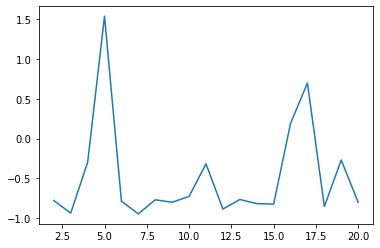

In [7]:
model_path=pd.Series(russel_index)

plt.plot(np.arange(1, len(model_path)+1),model_path.pct_change().dropna())


In [12]:
#1.2
russel_return=model_path.pct_change().dropna()
from statsmodels.tsa.stattools import adfuller
adfuller(russel_return[1:,])

(-3.7684280079431085,
 0.003247368575069438,
 0,
 18,
 {'1%': -3.859073285322359,
  '5%': -3.0420456927297668,
  '10%': -2.6609064197530863},
 19.645969984620727)

In [13]:
#1.3
returns_0 = russel_return[1:,].values.tolist()

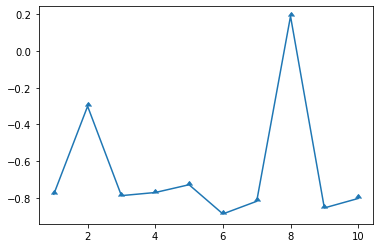

In [14]:
returns_1 =[]
for i in range(0,len(russel_return[1:,]),2):# calculate average return for each of 100 periods.
    c=returns_0[i]
    returns_1.append(c)

plt.plot(np.arange(1, len(returns_1)+1), returns_1, marker=10)
plt.show()

In [15]:
#1.4
index=[]
for i in range(0,1000,100): #update 10000 process around 100 periods.
    val=pd.DataFrame(model[i]).mean()
    index.append(val)
index=pd.DataFrame(index)

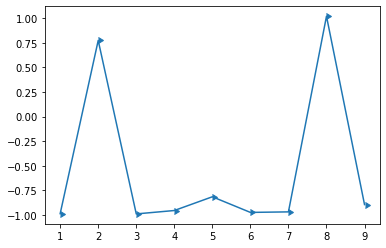

In [16]:
returns0_100 = index.pct_change()# calculate average return for each of 100 periods.
returns0_100 = returns0_100.dropna(how='all').dropna(axis=1)
returns1_100=returns0_100.values.tolist()
plt.plot(np.arange(1, len(returns1_100)+1), returns1_100, marker=9)
plt.show()

In [17]:
#1.5

Based on the results here:


Overall, We can tell that Russell 1000 have a better performance (higher average returns, smaller vairance among stocks), while the overall 10,000 stocks' returns are much lower and it has larger variance between different stock's returns. Return series p-value is close to 0, which means it doesn't have a unit root.
The plot(4) seems closer to plot(2), it's better to use the overall market head return to calculate the index instead of using the head of each 50 period average head return.



# Question2

(1) Plot the return processes of the 11 selected sector ETFs and the S&P 500 index. Using a scree plot and by analyzing the eigenvalues of the correlation matrix, choose a sufficient number of factors.
(2) Upon finding the adequate number of factors, use the vari- max method to find a final rotated factor solution. Build a factor model to predict the S&P 500 stock index returns.
(3) Apply the factor sorting method on the most important fac- tor and design a long-short strategy for the 11 selected sec- tors where you put the neutral return stocks in the middle bucket and divide the positive and negative factor stocks evenly into other four buckets. In this, we assume a nor- mal distribution of the factor value, and we long the best performing bucket and short the worst performing bucket. Compare this strategy with the benchmark return of the S&P 500 stock index return.
